In [1]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from konlpy.tag import Kkma

In [2]:
data=pd.read_csv("C:/Users/김명준/Downloads/science_sports.CSV", encoding='cp949')
data.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,7.100501e+06,20211119,전자신문,박종진,"방송콘텐츠진흥재단, '사막의별똥별찾기' 시상식 개최",문화>방송_연예,문화>전시_공연,IT_과학>인터넷_SNS,NaN,NaN,NaN,정상모,"서울,장르,독창","방송콘텐츠진흥재단,메가몬스터상,메가몬스터,SBS,현대,파이터,SBS미디어넷,롯데호텔","방송콘텐츠진흥재단,사막의별똥별,시상식,개최,방송콘텐츠진흥재단,사막의별똥별,드라마,극...","사막의별똥별,이상수,마더스,디케,정상모,우수상,미디어넷,방송콘텐츠진흥재단,메가몬스터...",방송콘텐츠진흥재단이 제13회 드라마극본공모전 '사막의별똥별찾기' 시상식을 19일 롯...,http://www.etnews.com/20211119000186,NaN
1,8.200101e+06,20211119,OBS,김용재,인천 경기 일원 오늘 밤 미세먼지주의보 발령,사회>날씨,사회>환경,스포츠>월드컵,NaN,NaN,NaN,NaN,"수원,안산,동구,경기,중부,화성,서구,경기도내,초미,부천,인천",한국환경공단,"인천,경기,일원,미세,먼지주의보,발령,한국환경공단,8시,기준,인천,서구,동구,미세먼...","미세먼지주의보,마이크로그램,먼지주의보,시군,인천,부천,화성,수원,세제곱,경기도,안산...",한국환경공단은 오후 8시를 기준으로 인천 서구와 동구에 미세먼지주의보가 발령됐다고 ...,http://www.obsnews.co.kr/news/articleView.html...,NaN
2,1.400201e+06,20211119,대전일보,강정의,"대전 찾은 李, 과학기술계 청년 표심 구애",IT_과학>콘텐츠,NaN,NaN,NaN,NaN,NaN,"오프라,이재명","대전,중국,유럽,남문광장,엑스포,중계,대한민국","ETRI서,민주당,정부,ETRI,한국전자통신연구원,미래산업","대전,과학기술계,청년,표심,구애,ETRI,대전,발전,과학,중심지,약속,강조,게임,산...","etri,과학기술,오프라인,중심지,지스타,유럽,청년층,과학기술계,자율성,한국전자통신...",대전을 찾은 이재명 민주당 대선 후보가 대전을 과학기술의 중심지로 완성시킬 것을 약...,http://www.daejonilbo.com/news/newsitem.asp?pk...,NaN
3,1.600301e+06,20211119,광주일보,유연재,"‘리시브가 아쉬워’ AI페퍼스, GS칼텍스에 0-3 패배",스포츠>농구_배구,스포츠>올림픽_아시안게임,스포츠>월드컵,NaN,NaN,NaN,NaN,"경기,안테,광주","AI페퍼스,페퍼저축은행,GS칼텍스,V리그,도드람","리시브,AI페퍼스,GS칼텍스,패배,광주,페퍼,저축,은행,여자,배구단,AI,페퍼스,G...","ai페퍼스,페퍼스,리시브,광주,1세트,유서연,서브에이스,ai,서울장충체육관,칼텍스,...",광주 페퍼저축은행 여자배구단 AI페퍼스가 GS칼텍스에게 패배했다.\nAI페퍼스는 1...,http://www.kwangju.co.kr/news_view.php?aid=163...,NaN
4,1.100611e+06,20211119,서울신문,신동원,"이노비즈협회, 해외시장 진출 지원 위한 종합 기술교류 상담회",경제>산업_기업,IT_과학>과학,경제>무역,NaN,NaN,NaN,임병훈,"서울,터키","상담회,터키중소기업진흥청(KOSGEB,이노비즈,메디젠휴먼케어,중소벤처기업부,지톤그룹...","이노비즈협회,지원,해외,시장,진출,상담회,종합,교류,중소벤처기업부,이노비즈협회,임피...","상담회,중소기업,이노비즈협회,터키,이노비즈,온라인,드론,체결식,특장자,임병훈,서울,...",중소벤처기업부와 이노비즈협회는 19일 서울 임피리얼팰리스호텔에서 ‘2021년 종합 ...,http://go.seoul.co.kr/news/newsView.php?id=202...,NaN


In [3]:
data["본문"] = data["본문"].str.replace(pat=r'[^\w]', repl=r'', regex=True)

In [4]:
okt = Okt() #okt사용
print(okt.pos(data["본문"][3]))

[('광주', 'Noun'), ('페퍼', 'Noun'), ('저축은행', 'Noun'), ('여자배구', 'Noun'), ('단', 'Noun'), ('AI', 'Alpha'), ('페퍼스', 'Noun'), ('가', 'Josa'), ('GS', 'Alpha'), ('칼텍스', 'Noun'), ('에게', 'Josa'), ('패배했다', 'Adjective'), ('AI', 'Alpha'), ('페퍼스', 'Noun'), ('는', 'Josa'), ('19일', 'Number'), ('오후', 'Foreign'), ('7시', 'Number'), ('서울장충체육관에서열린도드람', 'Foreign'), ('20212022', 'Number'), ('V', 'Alpha'), ('리그', 'Noun'), ('경기', 'Noun'), ('에서', 'Josa'), ('GS', 'Alpha'), ('칼텍스', 'Noun'), ('와', 'Josa'), ('맞붙어', 'Verb'), ('03162518252125', 'Number'), ('로', 'Noun'), ('패배했다', 'Adjective'), ('1', 'Number'), ('세트', 'Noun'), ('는', 'Josa'), ('66', 'Number'), ('까지', 'Verb'), ('따라', 'Verb'), ('붙으며', 'Verb'), ('접전', 'Noun'), ('이', 'Josa'), ('되는듯', 'Verb'), ('했으나', 'Verb'), ('유서연', 'Noun'), ('의', 'Josa'), ('블로킹', 'Noun'), ('오픈', 'Noun'), ('공격', 'Noun'), ('에', 'Josa'), ('잇따라실', 'Verb'), ('점', 'Noun'), ('하', 'Suffix'), ('며', 'Josa'), ('1016', 'Number'), ('으로', 'Josa')]


In [5]:
kkma = Kkma() #kkma사용
print(kkma.pos(data["본문"][3]))

[('광주', 'NNG'), ('페', 'UN'), ('푸', 'VV'), ('어', 'ECS'), ('저축', 'NNG'), ('은행', 'NNG'), ('여자', 'NNG'), ('배구', 'NNG'), ('단', 'XSN'), ('AI', 'OL'), ('페퍼스', 'UN'), ('가', 'JKS'), ('GS', 'OL'), ('칼', 'NNG'), ('텍스', 'NNG'), ('에게', 'JKM'), ('패배', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN'), ('AI', 'OL'), ('페', 'UN'), ('푸', 'VV'), ('어', 'ECS'), ('스', 'VV'), ('는', 'ETD'), ('19', 'NR'), ('일', 'NNM'), ('오후', 'NNG'), ('7', 'NR'), ('시', 'NNM'), ('서울', 'NNG'), ('장', 'NNG'), ('충', 'NNG'), ('체육관', 'NNG'), ('에서', 'JKM'), ('열린', 'NNP'), ('도', 'JX'), ('드', 'VV'), ('람', 'ECD'), ('20212022', 'NR'), ('V', 'OL'), ('리그', 'NNG'), ('경기', 'NNG'), ('에서', 'JKM'), ('GS', 'OL'), ('칼', 'NNG'), ('텍스', 'NNG'), ('와', 'JKM'), ('맞붙', 'VV'), ('어', 'ECD'), ('03162518252125', 'NR'), ('로', 'JKM'), ('패배', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'ECS'), ('1', 'NR'), ('세트', 'NNG'), ('는', 'JX'), ('66', 'NR'), ('까지', 'JX'), ('따라붙', 'VV'), ('으며', 'ECE'), ('접전', 'NNG'), ('이', 'JKC'), ('되', 'VV'), ('는', 'ETD'), ('듯하', 'VXA'), ('

In [6]:
sentence_list = kkma.sentences(data["본문"][3])
print(sentence_list)

['광주 페 퍼 저축은행 여자 배구단 AI 페퍼스가 GS 칼 텍스에게 패배했다', 'AI 페 퍼 스는 19일 오후 7시 서울 장 충 체육관에서 열린도 드람 20212022V 리그경기에서 GS 칼 텍스와 맞붙어 03162518252125로 패배했다 1 세트는 66까지 따라붙으며 접전이 되는 듯했으나 유서 연의 블로킹 오픈공격에 잇따라 실점하며 1016으로']


In [7]:
for sentence in sentence_list:
    pos_list = okt.pos(sentence)
    print(pos_list)

[('광주', 'Noun'), ('페', 'Noun'), ('퍼', 'PreEomi'), ('저축은행', 'Noun'), ('여자', 'Noun'), ('배구단', 'Verb'), ('AI', 'Alpha'), ('페퍼스', 'Noun'), ('가', 'Josa'), ('GS', 'Alpha'), ('칼', 'Noun'), ('텍스', 'Noun'), ('에게', 'Josa'), ('패배했다', 'Adjective')]
[('AI', 'Alpha'), ('페', 'Noun'), ('퍼', 'PreEomi'), ('스', 'Noun'), ('는', 'Josa'), ('19일', 'Number'), ('오후', 'Noun'), ('7시', 'Number'), ('서울', 'Noun'), ('장', 'Noun'), ('충', 'Noun'), ('체육관', 'Noun'), ('에서', 'Josa'), ('열린도', 'Verb'), ('드람', 'Noun'), ('20212022', 'Number'), ('V', 'Alpha'), ('리그', 'Noun'), ('경기', 'Noun'), ('에서', 'Josa'), ('GS', 'Alpha'), ('칼', 'Noun'), ('텍스', 'Noun'), ('와', 'Josa'), ('맞붙어', 'Verb'), ('03162518252125', 'Number'), ('로', 'Noun'), ('패배했다', 'Adjective'), ('1', 'Number'), ('세트', 'Noun'), ('는', 'Josa'), ('66', 'Number'), ('까지', 'Josa'), ('따라', 'Verb'), ('붙으며', 'Verb'), ('접전', 'Noun'), ('이', 'Josa'), ('되는', 'Verb'), ('듯', 'Noun'), ('했으나', 'Verb'), ('유서', 'Noun'), ('연', 'Noun'), ('의', 'Josa'), ('블로킹', 'Noun'), ('오픈', 'Noun'), ('공격', '

In [8]:
for sentence in sentence_list:
    pos_list = okt.nouns(sentence) #okt로 명사뽑기
    print(pos_list)

['광주', '페', '저축은행', '여자', '페퍼스', '칼', '텍스']
['페', '스', '오후', '서울', '장', '충', '체육관', '드람', '리그', '경기', '칼', '텍스', '로', '세트', '접전', '듯', '유서', '연', '블로킹', '오픈', '공격', '실점']


In [9]:
for sentence in sentence_list:
    pos_list = kkma.pos(sentence) 
    print(pos_list)

[('광주', 'NNG'), ('페', 'UN'), ('푸', 'VV'), ('어', 'ECS'), ('저축', 'NNG'), ('은행', 'NNG'), ('여자', 'NNG'), ('배구', 'NNG'), ('단', 'XSN'), ('AI', 'OL'), ('페퍼스', 'UN'), ('가', 'JKS'), ('GS', 'OL'), ('칼', 'NNG'), ('텍스', 'NNG'), ('에게', 'JKM'), ('패배', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'EFN')]
[('AI', 'OL'), ('페', 'UN'), ('푸', 'VV'), ('어', 'ECS'), ('스', 'VV'), ('는', 'ETD'), ('19', 'NR'), ('일', 'NNM'), ('오후', 'NNG'), ('7', 'NR'), ('시', 'NNM'), ('서울', 'NNG'), ('장', 'NNG'), ('충', 'NNG'), ('체육관', 'NNG'), ('에서', 'JKM'), ('열린', 'NNP'), ('도', 'JX'), ('드', 'VV'), ('람', 'ECD'), ('20212022', 'NR'), ('V', 'OL'), ('리그', 'NNG'), ('경기', 'NNG'), ('에서', 'JKM'), ('GS', 'OL'), ('칼', 'NNG'), ('텍스', 'NNG'), ('와', 'JKM'), ('맞붙', 'VV'), ('어', 'ECD'), ('03162518252125', 'NR'), ('로', 'JKM'), ('패배', 'NNG'), ('하', 'XSV'), ('었', 'EPT'), ('다', 'ECS'), ('1', 'NR'), ('세트', 'NNG'), ('는', 'JX'), ('66', 'NR'), ('까지', 'JX'), ('따라붙', 'VV'), ('으며', 'ECE'), ('접전', 'NNG'), ('이', 'JKC'), ('되', 'VV'), ('는', 'ETD'), ('듯하', 'VXA'), (

In [10]:
for sentence in sentence_list: 
    pos_list = kkma.nouns(sentence) #kkma로 명사뽑기
    print(pos_list)

['광주', '페', '저축', '저축은행', '은행', '여자', '배구', '페퍼스', '칼', '텍스', '패배']
['페', '19', '19일', '일', '오후', '7', '7시', '시', '서울', '장', '충', '체육관', '열린', '20212022', '리그', '리그경기', '경기', '칼', '텍스', '03162518252125', '패배', '1', '세트', '66', '접전', '유서', '연의', '블로킹', '오픈', '오픈공격', '공격', '실점', '1016']


In [11]:
tag_sentence_list = [] # 형태소분석 후 기사단위의 형태소 리스트를 저장할 리스트를 생성합니다.

pos_list = ["NNG", "NNP"] # 형태소 중 꼭 포함해야하는 형태소 태그를 리스트로 생성합니다

now = 0
for article in data["본문"][:500]:
    now += 1
    print(now, end="\r")
    sentence_list = kkma.sentences(article)
    tag_sentence = []
    for sentence in sentence_list:
        tag_list = kkma.pos(sentence)
        for word, pos in tag_list:
            if pos in pos_list and word  and len(word) > 1:
                tag_sentence.append(word)
    tag_sentence_list.append(tag_sentence)

In [12]:
word_frequency = {}

for tag_sentence in tag_sentence_list:
    for word in tag_sentence:
        if word in word_frequency.keys():
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1

# word_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬
word_count = []
for word, freq in word_frequency.items():
    word_count.append([word, freq])
word_count.sort(key=lambda elem: elem[1], reverse=True)

# 단어의 빈도 상위 N개를 출력합니다.
for word, freq in word_count[:20]:
    print(word + "\t" + str(freq))

한국	150
기술	128
기업	102
기자	101
개발	98
서비스	91
미국	88
시장	82
콘텐츠	81
정보	77
글로벌	67
대표	66
세계	66
선수	65
프로	65
국내	62
과학	60
이번	59
연구	56
협력	54


In [13]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

In [40]:
# 추출한 단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
for tag_sentence in tag_sentence_list:
    # wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
    # 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
    # random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
    import random
    random.shuffle(tag_sentence)
    for word in tag_sentence:
        noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

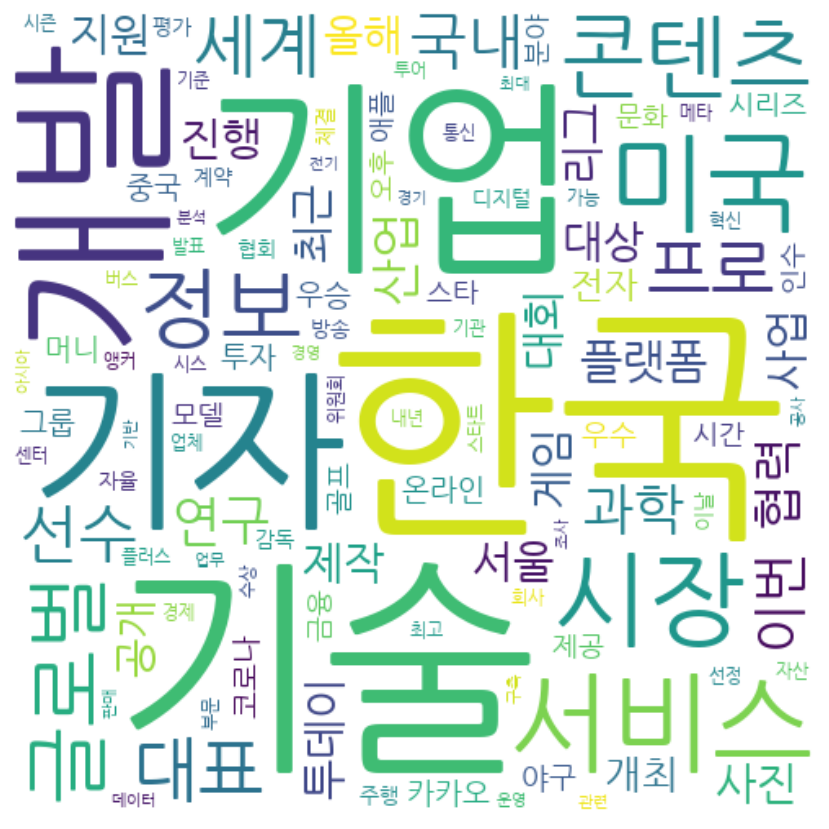

In [41]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path="C:/Users/김명준/Downloads/Font/NanumGothic.ttf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=10              #최소 글자 크기
max_font_size=150             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


In [42]:
# 연관어를 알아볼 키워드를 지정합니다.
# 키워드는 문서에 반드시 포함된 단어만 지정해야합니다.
keyword = "프로"

# 연관단어와 그 출현빈도를 저장할 딕셔너리를 생성합니다.
co_frequency = {}

for tag_sentence in tag_sentence_list:
    if keyword not in tag_sentence:
        continue
    index = tag_sentence.index(keyword)
    # 연관단어의 정의을 keyword 앞, 뒤의 3단어까지 포함된 단어로 지정합니다.
    window = 3
    co_word_list = tag_sentence[index-window:index+window+1]
    for word in co_word_list:
        # 단어가 co_frequency 키(key)값에 존재하는 경우 값(value)만 1을 더하고,
        # 없는 경우에는 1로 초기화합니다.
        if word in co_frequency.keys():
            co_frequency[word] += 1
        else:
            co_frequency[word] = 1

# co_frequency에 저장된 단어의 빈도를 리스트에 저장하고 정렬합니다.
co_word_list = []
for i, j in co_frequency.items():
    co_word_list.append((i, j))
co_word_list.sort(key=lambda elem: elem[1], reverse=True)

# 연관단어의 빈도 상위 N개를 출력합니다.
for word, frequency in co_word_list[:10]:
    print(word + "\t" + str(frequency))

프로	49
한국	7
투어	6
우승	5
구단	4
리그	4
여자	3
대회	3
코치	3
감독	3


In [43]:
# 추출한 연관단어 리스트를 활용해 명사만으로 이루어진 문자열을 생성합니다.
noun_string = ""

# 명사를 띄어쓰기 구분자로 붙혀줍니다.
noun_list = []
for word, frequency in co_word_list[:10]:
    for i in range(frequency):
        noun_list.append(word)

# wordcloud 패키지는 연속되는 단어를 하나로 인식합니다.
# 단어를 섞어 단어단위로 워드클라우드가 생성될 수 있도록 합니다.
# random 패키지의 shuffle(LIST) 함수는 리스트의 순서를 랜덤으로 섞어줍니다.
import random
random.shuffle(noun_list)

for word in noun_list:
    noun_string += word + " "

# 마지막에 붙은 띄어쓰기를 제거합니다.
noun_string = noun_string.strip()

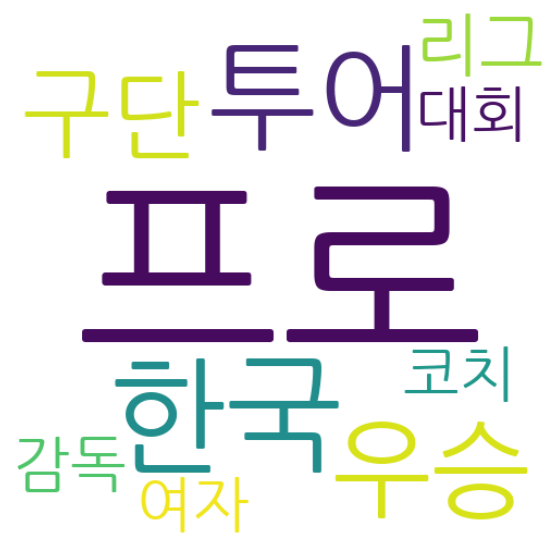

In [44]:
# 워드클라우드를 생성하고 파일로 저장합니다.

# 워드클라우드 옵션을 선택합니다.
font_path="C:/Users/김명준/Downloads/Font/NanumGothic.ttf"  #폰트
background_color="white"      #배경색
margin=10                     #모서리 여백 넓이
min_font_size=20              #최소 글자 크기
max_font_size=200             #최대 글자 크기
width=500                     #이미지 가로 크기
height=500                    #이미지 세로 크기
wc = WordCloud(font_path=font_path, background_color=background_color, \
               margin=margin, min_font_size=min_font_size, \
               max_font_size=max_font_size, width=width, height=height)
wc.generate(noun_string)

# 생성된 워드클라우드를 이미지로 생성합니다.
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()